<a href="https://colab.research.google.com/github/AmonAmanyabyona/AI_systems/blob/main/sentiment_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment analysis project with ML flow and Drift detection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Extract the ZIP file into the parent folder


Mounted at /content/drive


In [ ]:
!mkdir -p /content/Sentiment_analysis


In [ ]:
!unzip /content/drive/MyDrive/Reviews.csv.zip -d /content/Sentiment_analysis

Archive:  /content/drive/MyDrive/Reviews.csv.zip
  inflating: /content/Sentiment_analysis/Reviews.csv  


In [ ]:
!pip install alibi-detect

In [ ]:
!pip install tensorflow

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading packag

True

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

Load the Data

In [ ]:

import pandas as pd
df = pd.read_csv('/content/Sentiment_analysis/Reviews.csv')

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
print(df.shape)

(568454, 10)


# EDA

Data Distribution


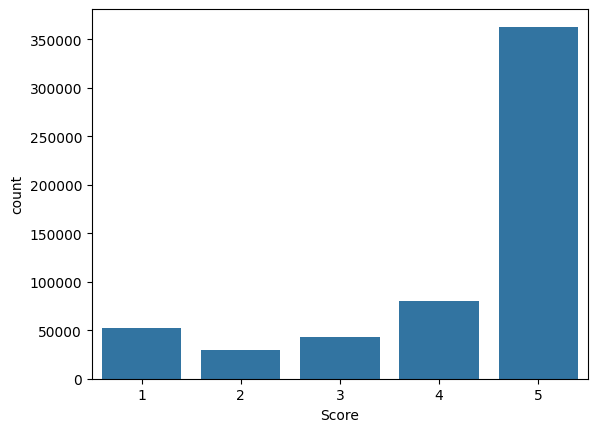

In [ ]:
#Visualize the distribution of the 'Score' column as it represents sentiment

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Score', data=df)
plt.show()


In [ ]:
df['Score'].value_counts().sort_index()

,count
Score,
1,52268
2,29769
3,42640
4,80655
5,363122


Text Analysis


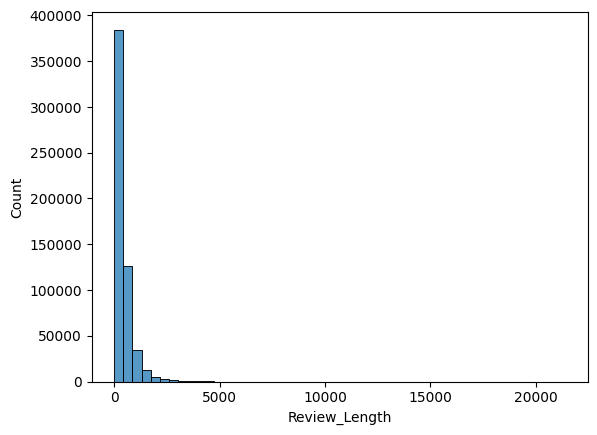

In [ ]:
#Analyze the length of reviews.

df['Review_Length'] = df['Text'].apply(len)
sns.histplot(df['Review_Length'], bins=50)
plt.show()

 Helpfulness Analysis


In [ ]:
#Calculate the helpfulness ratio.

df['Helpfulness_Ratio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
df['Helpfulness_Ratio'].fillna(0, inplace=True)  # Handle division by zero

<ipython-input-11-e90f8e98637e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Helpfulness_Ratio'].fillna(0, inplace=True)  # Handle division by zero


Visualize the helpfulness ratio.


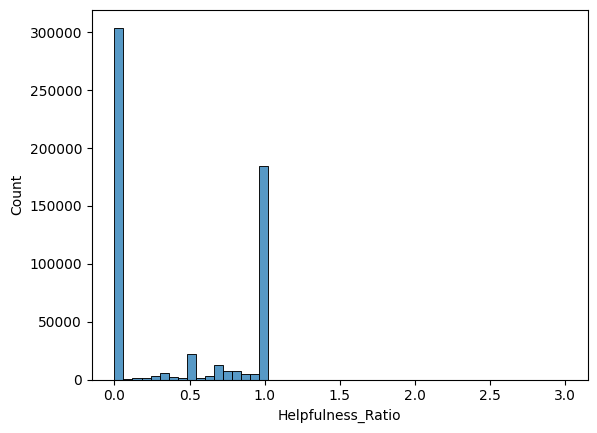

In [ ]:

sns.histplot(df['Helpfulness_Ratio'], bins=50)
plt.show()

Time Analysis


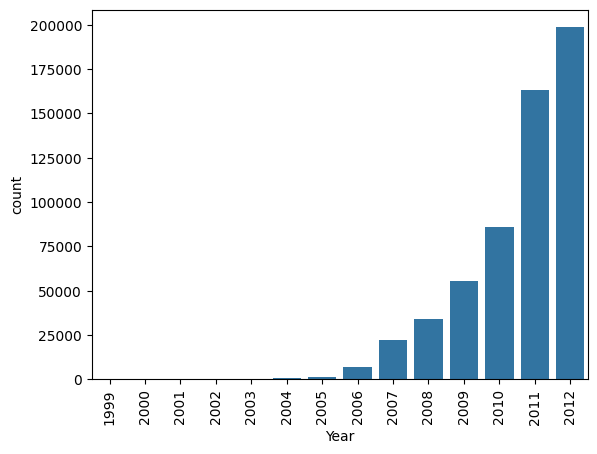

In [ ]:
#Convert 'Time' column to datetime and analyze trends over time.

df['Time'] = pd.to_datetime(df['Time'], unit='s')
df['Year'] = df['Time'].dt.year
sns.countplot(x='Year', data=df)
plt.xticks(rotation=90)
plt.show()

Summary and Text Analysis


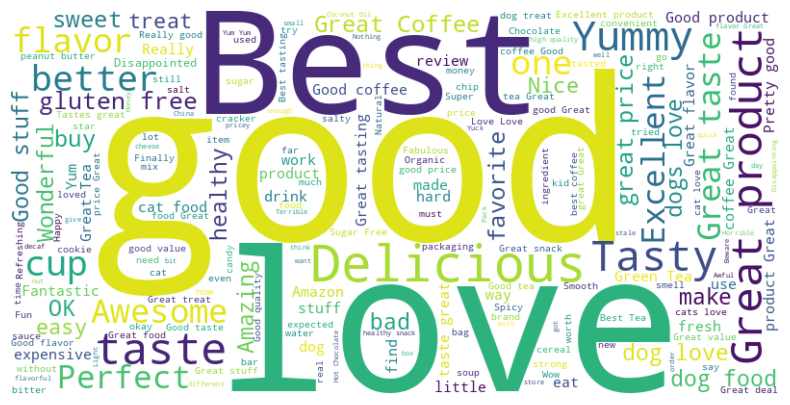

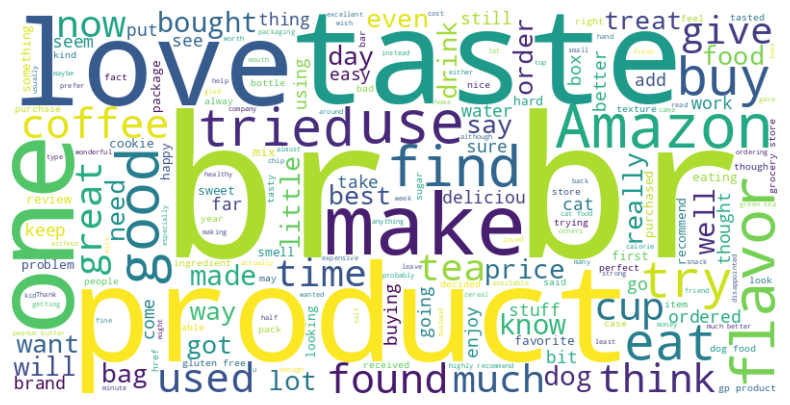

In [ ]:
#Word cloud for the 'Summary' and 'Text' columns to visualize common words.

from wordcloud import WordCloud

# Generate word cloud for 'Summary'
summary_text = ' '.join(df['Summary'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Generate word cloud for 'Text'
review_text = ' '.join(df['Text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#SAMPLE USAGE

In [ ]:
df = df.head(500)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Review_Length,Helpfulness_Ratio,Year
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,1.0,2011
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,0.0,2012
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,509,1.0,2008
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,219,1.0,2011
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,140,0.0,2012


In [ ]:
print(df.shape)


(500, 13)


In [ ]:
print(df.head())
print(df.info())
print(df.describe())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score       Time  \
0                     1                       1      5 2011-04-27   
1                     0                       0      1 2012-09-07   
2                     1                       1      4 2008-08-18   
3                     3                       3      2 2011-06-13   
4                     0                       0      5 2012-10-21   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1     

# DATA PREPROCESSING

In [ ]:
example = df['Text'][30]
print(example)

I have never been a huge coffee fan. However, my mother purchased this little machine and talked me into trying the Latte Macciato. No Coffee Shop has a better one and I like most of the other products, too (as a usually non-coffee drinker!).<br />The little Dolche Guesto Machine is super easy to use and prepares a really good Coffee/Latte/Cappuccino/etc in less than a minute (if water is heated up). I would recommend the Dolce Gusto to anyone. Too good for the price and I'am getting one myself! :)


In [ ]:
nltk.word_tokenize(example)

['I',
 'have',
 'never',
 'been',
 'a',
 'huge',
 'coffee',
 'fan',
 '.',
 'However',
 ',',
 'my',
 'mother',
 'purchased',
 'this',
 'little',
 'machine',
 'and',
 'talked',
 'me',
 'into',
 'trying',
 'the',
 'Latte',
 'Macciato',
 '.',
 'No',
 'Coffee',
 'Shop',
 'has',
 'a',
 'better',
 'one',
 'and',
 'I',
 'like',
 'most',
 'of',
 'the',
 'other',
 'products',
 ',',
 'too',
 '(',
 'as',
 'a',
 'usually',
 'non-coffee',
 'drinker',
 '!',
 ')',
 '.',
 '<',
 'br',
 '/',
 '>',
 'The',
 'little',
 'Dolche',
 'Guesto',
 'Machine',
 'is',
 'super',
 'easy',
 'to',
 'use',
 'and',
 'prepares',
 'a',
 'really',
 'good',
 'Coffee/Latte/Cappuccino/etc',
 'in',
 'less',
 'than',
 'a',
 'minute',
 '(',
 'if',
 'water',
 'is',
 'heated',
 'up',
 ')',
 '.',
 'I',
 'would',
 'recommend',
 'the',
 'Dolce',
 'Gusto',
 'to',
 'anyone',
 '.',
 'Too',
 'good',
 'for',
 'the',
 'price',
 'and',
 "I'am",
 'getting',
 'one',
 'myself',
 '!',
 ':',
 ')']

Find Part of Speech taggings

In [ ]:
tokens = nltk.wordpunct_tokenize(example)
tokens[:20]

['I',
 'have',
 'never',
 'been',
 'a',
 'huge',
 'coffee',
 'fan',
 '.',
 'However',
 ',',
 'my',
 'mother',
 'purchased',
 'this',
 'little',
 'machine',
 'and',
 'talked',
 'me']

In [ ]:
tags = nltk.pos_tag(tokens)
tags

[('I', 'PRP'),
 ('have', 'VBP'),
 ('never', 'RB'),
 ('been', 'VBN'),
 ('a', 'DT'),
 ('huge', 'JJ'),
 ('coffee', 'NN'),
 ('fan', 'NN'),
 ('.', '.'),
 ('However', 'RB'),
 (',', ','),
 ('my', 'PRP$'),
 ('mother', 'NN'),
 ('purchased', 'VBD'),
 ('this', 'DT'),
 ('little', 'JJ'),
 ('machine', 'NN'),
 ('and', 'CC'),
 ('talked', 'VBD'),
 ('me', 'PRP'),
 ('into', 'IN'),
 ('trying', 'VBG'),
 ('the', 'DT'),
 ('Latte', 'NNP'),
 ('Macciato', 'NNP'),
 ('.', '.'),
 ('No', 'NNP'),
 ('Coffee', 'NNP'),
 ('Shop', 'NNP'),
 ('has', 'VBZ'),
 ('a', 'DT'),
 ('better', 'JJR'),
 ('one', 'CD'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ('like', 'VBP'),
 ('most', 'JJS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('other', 'JJ'),
 ('products', 'NNS'),
 (',', ','),
 ('too', 'RB'),
 ('(', '('),
 ('as', 'IN'),
 ('a', 'DT'),
 ('usually', 'RB'),
 ('non', 'JJ'),
 ('-', ':'),
 ('coffee', 'NN'),
 ('drinker', 'NN'),
 ('!).<', 'NNP'),
 ('br', 'NN'),
 ('/>', 'VBD'),
 ('The', 'DT'),
 ('little', 'JJ'),
 ('Dolche', 'NNP'),
 ('Guesto', 'NNP'),
 ('

Put these POS into entities

In [ ]:
entities = nltk.chunk.ne_chunk(tags)
entities.pprint()

(S
  I/PRP
  have/VBP
  never/RB
  been/VBN
  a/DT
  huge/JJ
  coffee/NN
  fan/NN
  ./.
  However/RB
  ,/,
  my/PRP$
  mother/NN
  purchased/VBD
  this/DT
  little/JJ
  machine/NN
  and/CC
  talked/VBD
  me/PRP
  into/IN
  trying/VBG
  the/DT
  (ORGANIZATION Latte/NNP Macciato/NNP)
  ./.
  (PERSON No/NNP Coffee/NNP Shop/NNP)
  has/VBZ
  a/DT
  better/JJR
  one/CD
  and/CC
  I/PRP
  like/VBP
  most/JJS
  of/IN
  the/DT
  other/JJ
  products/NNS
  ,/,
  too/RB
  (/(
  as/IN
  a/DT
  usually/RB
  non/JJ
  -/:
  coffee/NN
  drinker/NN
  !).</NNP
  br/NN
  />/VBD
  The/DT
  little/JJ
  (PERSON Dolche/NNP Guesto/NNP Machine/NNP)
  is/VBZ
  super/JJ
  easy/JJ
  to/TO
  use/VB
  and/CC
  prepares/VBZ
  a/DT
  really/RB
  good/JJ
  (PERSON Coffee/NNP)
  //NNP
  (PERSON Latte/NNP)
  //NNP
  Cappuccino/NNP
  //NNP
  etc/FW
  in/IN
  less/JJR
  than/IN
  a/DT
  minute/NN
  (/(
  if/IN
  water/NN
  is/VBZ
  heated/VBN
  up/IN
  )./NN
  I/PRP
  would/MD
  recommend/VB
  the/DT
  (ORGANIZATION Dolce/

#Text Cleaning


•  **Remove Punctuation and Numbers**: Used regular expressions to remove all non-alphabetic characters.

•  **Convert to Lowercase**: Ensured uniformity by converting all text to lowercase.

•  **Remove Stop Words**: Filtered out common words that do not contribute to sentiment (e.g., "the", "is").

•  **Lemmatization**: Reduced words to their base form using the WordNet Lemmatizer.

In [ ]:
#Remove punctuation, stop words, and perform stemming/lemmatization.

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stop words and lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)

# Feature Engineering


The max_features parameter in TfidfVectorizer specifies the maximum number of features (unique words) to consider when transforming the text data into numerical data.

This means the vectorizer will consider only the top 500 most frequent words in the corpus. If dataset has more unique words, only the 500 most common ones will be used.

In [ ]:
#Convert text data into numerical data using TF-IDF.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['Cleaned_Text']).toarray()
y = df['Score']

Train-Test Split


In [ ]:
#Split the data into training and testing sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training using **LogisticRegression** for classification task as a linear classifier


In [ ]:
#Choose a model and train it (e.g., Logistic Regression).

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation


In [ ]:
#Evaluate the model using metrics like accuracy, precision, recall, and F1-score.

from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.52      0.50      0.51     10326
           2       0.35      0.07      0.11      5855
           3       0.38      0.17      0.23      8485
           4       0.46      0.16      0.24     16123
           5       0.74      0.95      0.83     72902

    accuracy                           0.69    113691
   macro avg       0.49      0.37      0.39    113691
weighted avg       0.64      0.69      0.64    113691



# Test the model with the first 5 texts from the test dataset


In [ ]:
# Get the first 5 texts from the test dataset
first_5_texts = X_test[:5]

# Predict sentiment for the first 5 texts
first_5_predictions = model.predict(first_5_texts)

# Print the first 5 texts and their predicted sentiments
for i, text in enumerate(first_5_texts):
    original_text = ' '.join(vectorizer.inverse_transform(text.reshape(1, -1))[0])
    print(f"Text: {original_text}")
    print(f"Predicted Sentiment: {first_5_predictions[i]}")
    print()

Text: best bit brand chocolate cooky couple crunchy free gluten good make mean might real something sweet taste texture think tried version
Predicted Sentiment: 5

Text: bottle cat come crunchy dry end ever find flavor get house however like love much nice perfect pop seems three time top treat yet
Predicted Sentiment: 5

Text: company favorite le little said since taste
Predicted Sentiment: 5

Text: actually back best better bit bite bowl br brand came cinnamon come easily fat fiber fine first flavor give good guess half kind life like little look making might milk much need new nothing one original plus probably product protein put reason serving side size small smaller snack something star sugar sweet taste think version want well wheat without yes
Predicted Sentiment: 4

Text: aftertaste anything bottle box br choice content easy free give good hard know life like long love mixed must oz product really right small star sweet taste thought use want water well would
Predicted Sentime

# Custom input text

In [ ]:
# Function to predict sentiment for custom input text
def predict_sentiment(text):
    cleaned_text = clean_text(text)
    text_vec = vectorizer.transform([cleaned_text])
    prediction = model.predict(text_vec)
    return prediction[0]

# Test the model with your own input text
custom_text = "I love this product! It's amazing."
print("Custom Text Sentiment:", predict_sentiment(custom_text))

Custom Text Sentiment: 5


In [ ]:
# Function to predict sentiment for custom input text
def predict_sentiment(text):
    cleaned_text = clean_text(text)
    text_vec = vectorizer.transform([cleaned_text])
    prediction = model.predict(text_vec)
    return prediction[0]

# Test the model with your own input text
custom_text = "I hate this product but It's a ok."
print("Custom Text Sentiment:", predict_sentiment(custom_text))

Custom Text Sentiment: 3


In [ ]:
# Function to predict sentiment for custom input text
def predict_sentiment(text):
    cleaned_text = clean_text(text)
    text_vec = vectorizer.transform([cleaned_text])
    prediction = model.predict(text_vec)
    return prediction[0]

# Test the model with your own input text
custom_text = "I hate this product."
print("Custom Text Sentiment:", predict_sentiment(custom_text))

Custom Text Sentiment: 1


# PRE-TRAINED MODEL

In [ ]:
!pip install transformers torch


In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Text'], df['Score'], test_size=0.2, random_state=42)

In [ ]:
# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=5)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenize the training data
train_encodings = tokenizer(X_train.tolist(), padding='max_length', truncation=True, max_length=128, return_tensors='pt')

# Tokenize the test data
test_encodings = tokenizer(X_test.tolist(), padding='max_length', truncation=True, max_length=128, return_tensors='pt')

Convert Labels to Tensors


In [ ]:
import torch

# Convert training labels to tensor
y_train_tensor = torch.tensor(y_train.tolist(), dtype=torch.long) - 1  # Assuming scores are from 1 to 5, subtract 1 to make them 0-indexed

# Convert test labels to tensor
y_test_tensor = torch.tensor(y_test.tolist(), dtype=torch.long) - 1

Create Datasets and DataLoaders


In [ ]:
# Create training dataset
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], y_train_tensor)

# Create test dataset
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], y_test_tensor)

# Create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)


Training Loop


In [ ]:
# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Training loop
model.train()
for epoch in range(3):  # Number of epochs
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch + 1}, Loss: {loss.item()}')


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Loss: 0.9696564674377441
Epoch 2, Loss: 0.9691931009292603
Epoch 3, Loss: 0.596595287322998


#Incorporating MLflow for tracking and drift detection

Install MLflow

In [ ]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 637.5/637.5 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.3 MB/s eta 0:00:00


Set up MLflow


In [ ]:
import mlflow
import mlflow.sklearn

mlflow.set_experiment("Sentiment_Analysis_Experiment")

2025/01/20 13:57:42 INFO mlflow.tracking.fluent: Experiment with name 'Sentiment_Analysis_Experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/238689534645805191', creation_time=1737381462947, experiment_id='238689534645805191', last_update_time=1737381462947, lifecycle_stage='active', name='Sentiment_Analysis_Experiment', tags={}>

#Train and evaluate model with MLflow tracking


In [ ]:
# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)


with mlflow.start_run() as run:
    # Training loop
    model.train()
    for epoch in range(20):  # Number of epochs
        for batch in train_dataloader:
            input_ids, attention_mask, labels = batch
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}')
        mlflow.log_metric("loss", loss.item(), step=epoch + 1)
    # Log model
    mlflow.pytorch.log_model(model, "model")
    # Print run_id
    run_id = run.info.run_id
    print(f"Run ID: {run_id}")

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Loss: 1.6126697063446045
Epoch 2, Loss: 1.1885991096496582
Epoch 3, Loss: 0.7633821368217468
Epoch 4, Loss: 0.7613157033920288
Epoch 5, Loss: 0.7085365653038025
Epoch 6, Loss: 0.3236751854419708
Epoch 7, Loss: 0.15846391022205353
Epoch 8, Loss: 0.11057792603969574
Epoch 9, Loss: 0.2207764983177185
Epoch 10, Loss: 0.031136633828282356
Epoch 11, Loss: 0.020779790356755257
Epoch 12, Loss: 0.022809939458966255
Epoch 13, Loss: 0.009030639193952084
Epoch 14, Loss: 0.008812472224235535
Epoch 15, Loss: 0.008250080980360508
Epoch 16, Loss: 0.004430851433426142
Epoch 17, Loss: 0.0038966448046267033
Epoch 18, Loss: 0.0019278471590951085
Epoch 19, Loss: 0.0031719300895929337
Epoch 20, Loss: 0.0032004378736019135


2025/01/20 15:24:14 WARNING mlflow.utils.requirements_utils: Found torch version (2.5.1+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.5.1' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/01/20 15:24:38 WARNING mlflow.utils.requirements_utils: The following packages were not found in the public PyPI package index as of 2024-12-04; if these packages are not present in the public PyPI index, you must install them manually before loading your model: {'google-genai'}
2025/01/20 15:24:38 WARNING mlflow.utils.requirements_utils: Found torchvision version (0.20.1+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torchvision==0.20.1' without the local version label to make it installable from PyPI. To specify pip requirements containing local version lab

Run ID: c01cd3e1b0114ddca08eb5b0a1b7e983


#Make Predictions on the First 5 Texts


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Select the first 5 texts from the test set
first_5_texts = X_test[:5].tolist()

# Tokenize the first 5 texts
first_5_encodings = tokenizer(first_5_texts, padding='max_length', truncation=True, max_length=128, return_tensors='pt')



In [ ]:
# Put the model in evaluation mode
model.eval()

# Make predictions
with torch.no_grad():
    outputs = model(first_5_encodings['input_ids'], attention_mask=first_5_encodings['attention_mask'])
    predictions = torch.argmax(outputs.logits, dim=-1)

# Convert predictions to numpy array
predictions = predictions.cpu().numpy()

# Print the predictions
print("Predictions for the first 5 texts:", predictions + 1)  # Adding 1 to match the original score range

Predictions for the first 5 texts: [1 3 5 5 5]


In [ ]:
# Print the first 5 texts and their predictions
for i, text in enumerate(first_5_texts):
    print(f"Text {i+1}: {text}")
    print(f"Predicted Score: {predictions[i] + 1}\n")  # Adding 1 to match the original score range

Text 1: bitter tasting coffee even enhanced cream honey definately cup coffee oh say bitter
Predicted Score: 1

Text 2: buyer beware please sweetener everybody maltitol alcohol sugar undigestible body know short time consuming one unsuspecting many cannot digest extreme intestinal bloating cramping massive amount gas person experience nausea diarrhea headache also experienced learned lesson hard way year ago fell love sugar free chocolate suzanne sommers used sell thought found sugar free chocolate nirvana first taste bliss short lived terrible side effect maltitol kicked discomfort unlike anything ever felt blew like balloon painful abdominal cramping symptom passed unpleasant though hard believe low calorie sweetener could culprit symptom gone stopped eating chocolate hunch something maltitol unfortunately confirmed year later purchased delicious sugar free popcorn local market taste amazing looking label wondering could possibly make yummy new sugarfree treat taste good heart sank f

#Evaluate the Model on the Entire Test Set


In [ ]:
# Make predictions on the entire test set
all_predictions = []
all_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=-1)
        all_predictions.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


# Print classification report
print(classification_report(all_labels, all_predictions))

              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.00      0.00      0.00         3
           2       0.18      0.22      0.20         9
           3       0.12      0.20      0.15        10
           4       0.83      0.77      0.80        71

    accuracy                           0.61       100
   macro avg       0.33      0.30      0.30       100
weighted avg       0.66      0.61      0.63       100



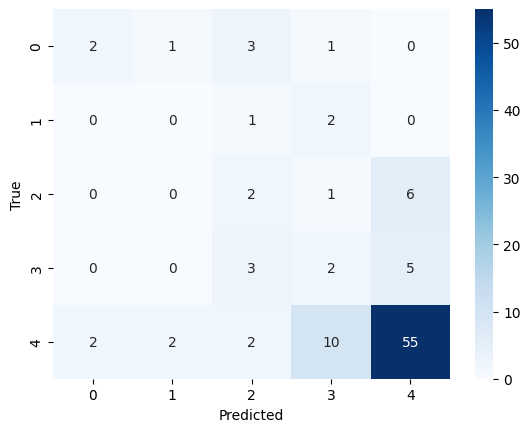

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
def predict_sentiment(text):
    # Tokenize the input text
    encoding = tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')

    # Put the model in evaluation mode
    model.eval()

    # Make prediction
    with torch.no_grad():
        outputs = model(encoding['input_ids'], attention_mask=encoding['attention_mask'])
        prediction = torch.argmax(outputs.logits, dim=-1)

    # Convert prediction to numpy array and adjust to original score range
    prediction = prediction.cpu().numpy()[0] + 1

    return prediction

In [ ]:
# Example text inputs
texts = [
    "This product is amazing! I absolutely love it.",
    "The quality is terrible and it broke after one use.",
    "It's okay, not the best but not the worst either.",
    "Excellent service and fast delivery. Highly recommend!",
    "The item was missing parts and customer service was unhelpful."
]

# Make predictions for each text
for i, text in enumerate(texts):
    prediction = predict_sentiment(text)
    print(f"Text {i+1}: {text}")
    print(f"Predicted Score: {prediction}\n")

Text 1: This product is amazing! I absolutely love it.
Predicted Score: 5

Text 2: The quality is terrible and it broke after one use.
Predicted Score: 1

Text 3: It's okay, not the best but not the worst either.
Predicted Score: 3

Text 4: Excellent service and fast delivery. Highly recommend!
Predicted Score: 5

Text 5: The item was missing parts and customer service was unhelpful.
Predicted Score: 3



#Serve the model locally using MLflow


In [ ]:
#Serve the model locally using MLflow
!mlflow models serve -m runs:/c01cd3e1b0114ddca08eb5b0a1b7e983/model -p 5000 --no-conda

2025/01/20 15:36:23 INFO mlflow.models.flavor_backend_registry: Selected backend for flavor 'python_function'
2025/01/20 15:36:23 INFO mlflow.pyfunc.backend: === Running command 'exec gunicorn --timeout=60 -b 127.0.0.1:5000 -w 1 ${GUNICORN_CMD_ARGS} -- mlflow.pyfunc.scoring_server.wsgi:app'
[2025-01-20 15:36:23 +0000] [28442] [INFO] Starting gunicorn 23.0.0
[2025-01-20 15:36:23 +0000] [28442] [INFO] Listening at: http://127.0.0.1:5000 (28442)
[2025-01-20 15:36:23 +0000] [28442] [INFO] Using worker: sync
[2025-01-20 15:36:23 +0000] [28447] [INFO] Booting worker with pid: 28447
2025/01/20 15:36:27 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - jaraco-collections (current: uninstalled, required: jaraco-collections==5.1.0)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.

**Note**
The /content/mlruns folder is created and it is for managing and tracking MLflow experiments, ensuring that all relevant data is stored in an organized and accessible manner.

This helps in maintaining reproducibility, comparison, and efficient model management.

These files are crucial for analyzing the performance of different runs they include:
1. Artifacts:
•  Artifacts such as model files, plots, and other outputs are stored in the artifacts subfolder within each run folder. These are important for model evaluation and deployment.

2. Metrics and Parameters:
•  Metrics and parameters are stored in JSON files within the run folders.


In [ ]:
#we can zip the folder and download it:

!zip -r mlruns.zip /content/mlruns

  adding: content/mlruns/ (stored 0%)
  adding: content/mlruns/0/ (stored 0%)
  adding: content/mlruns/0/meta.yaml (deflated 24%)
  adding: content/mlruns/.trash/ (stored 0%)
  adding: content/mlruns/models/ (stored 0%)
  adding: content/mlruns/238689534645805191/ (stored 0%)
  adding: content/mlruns/238689534645805191/meta.yaml (deflated 31%)
  adding: content/mlruns/238689534645805191/c01cd3e1b0114ddca08eb5b0a1b7e983/ (stored 0%)
  adding: content/mlruns/238689534645805191/c01cd3e1b0114ddca08eb5b0a1b7e983/meta.yaml (deflated 45%)
  adding: content/mlruns/238689534645805191/c01cd3e1b0114ddca08eb5b0a1b7e983/params/ (stored 0%)
  adding: content/mlruns/238689534645805191/c01cd3e1b0114ddca08eb5b0a1b7e983/artifacts/ (stored 0%)
  adding: content/mlruns/238689534645805191/c01cd3e1b0114ddca08eb5b0a1b7e983/artifacts/model/ (stored 0%)
  adding: content/mlruns/238689534645805191/c01cd3e1b0114ddca08eb5b0a1b7e983/artifacts/model/MLmodel (deflated 44%)
  adding: content/mlruns/238689534645805191

In [ ]:
# Download the zipped file
from google.colab import files
files.download('mlruns.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Or we can visualize the MLflow data directly in Colab by starting the MLflow UI and using Ngrok to create a public URL. (Covered at the end)


vs

#Implementing drift detection

Using Alibi Detect for Drift Detection and visualization

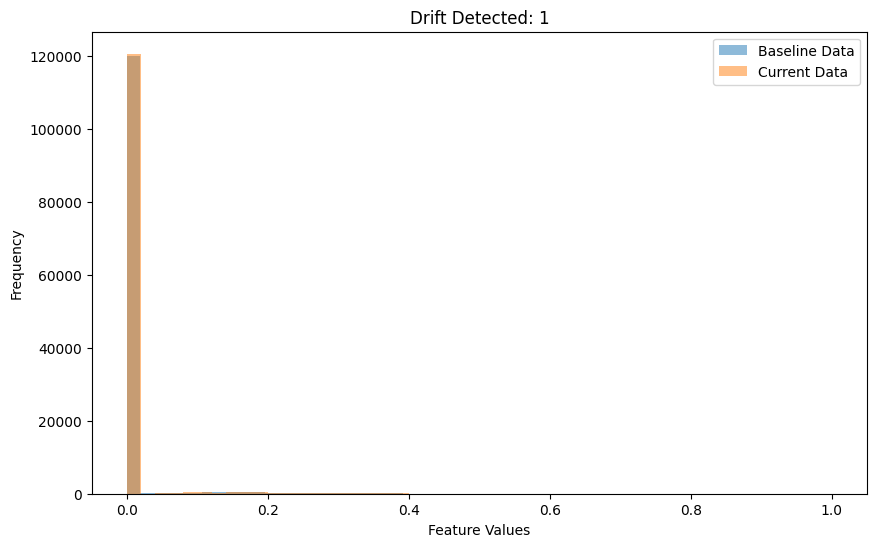

In [ ]:
#Using Alibi Detect for Drift Detection and visualization
from alibi_detect.cd import KSDrift
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Sentiment_analysis/Reviews.csv')

# Use the next 250 rows as the baseline data
baseline_df = df.iloc[500:750].copy()
current_df = df.iloc[750:1000].copy()  # Use the following 250 rows as the current data

# Clean the text in the baseline and current data
baseline_df.loc[:, 'Cleaned_Text'] = baseline_df['Text'].apply(clean_text)
current_df.loc[:, 'Cleaned_Text'] = current_df['Text'].apply(clean_text)

# Vectorize the baseline and current data
baseline_X = vectorizer.transform(baseline_df['Cleaned_Text']).toarray()
current_X = vectorizer.transform(current_df['Cleaned_Text']).toarray()

# Initialize the drift detector
cd = KSDrift(baseline_X, p_val=0.05)

# Detect drift
preds = cd.predict(current_X)
drift = preds['data']['is_drift']

# Plot the results
plt.figure(figsize=(10, 6))
plt.hist(baseline_X.flatten(), bins=50, alpha=0.5, label='Baseline Data')
plt.hist(current_X.flatten(), bins=50, alpha=0.5, label='Current Data')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title(f'Drift Detected: {drift}')
plt.legend()
plt.show()

# Log drift metrics to MLflow
mlflow.log_metric('drift_detected', int(drift))

to test if there is drift detection inject some drift to see if it works

**Interpretation**

We monitor and visualize changes in the data over time. By comparing the distributions of feature values in the baseline and current datasets, we can detect if there are significant changes (drift) that might affect the performance of the machine learning model.

#Adding a synthetic drift

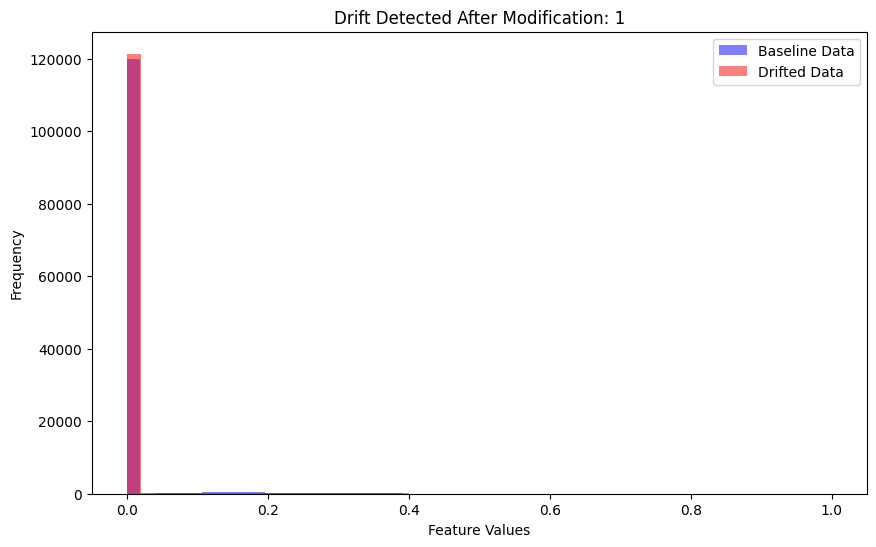

In [ ]:
import numpy as np
# Introduce synthetic drift by changing the sentiment of 60% of the data
drift_indices = np.random.choice(current_df.index, size=int(0.6 * len(current_df)), replace=False)
current_df.loc[drift_indices, 'Cleaned_Text'] = current_df.loc[drift_indices, 'Cleaned_Text'].apply(lambda x: ' '.join(np.random.choice(x.split(), size=len(x.split()))))

# Vectorize the modified current data
current_X_drifted = vectorizer.transform(current_df['Cleaned_Text']).toarray()

# Initialize the drift detector again
cd = KSDrift(baseline_X, p_val=0.05)

# Detect drift in the modified data
preds_drifted = cd.predict(current_X_drifted)
drift_drifted = preds_drifted['data']['is_drift']

# Plot the results for the drifted data with specified colors
plt.figure(figsize=(10, 6))
plt.hist(baseline_X.flatten(), bins=50, alpha=0.5, label='Baseline Data', color='blue')
plt.hist(current_X_drifted.flatten(), bins=50, alpha=0.5, label='Drifted Data', color='red')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title(f'Drift Detected After Modification: {drift_drifted}')
plt.legend()
plt.show()

# Log drift metrics to MLflow for the drifted data
mlflow.log_metric('drift_detected_drifted', int(drift_drifted))

#Re-training the Model to remove the drift detection


In [ ]:
# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# End any active run
if mlflow.active_run():
  mlflow.end_run()
with mlflow.start_run() as run:
    # Training loop
    model.train()
    for epoch in range(2):  # Number of epochs
        for batch in train_dataloader:
            input_ids, attention_mask, labels = batch
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}')
        mlflow.log_metric("loss", loss.item(), step=epoch + 1)
    # Log model
    mlflow.pytorch.log_model(model, "model")
    # Print run_id
    run_id = run.info.run_id
    print(f"Run ID: {run_id}")

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Loss: 0.41005250811576843
Epoch 2, Loss: 0.09633469581604004


2024/12/23 15:39:24 WARNING mlflow.utils.requirements_utils: Found torch version (2.5.1+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.5.1' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/12/23 15:39:44 WARNING mlflow.utils.requirements_utils: The following packages were not found in the public PyPI package index as of 2024-12-04; if these packages are not present in the public PyPI index, you must install them manually before loading your model: {'google-genai'}
2024/12/23 15:39:44 WARNING mlflow.utils.requirements_utils: Found torchvision version (0.20.1+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torchvision==0.20.1' without the local version label to make it installable from PyPI. To specify pip requirements containing local version lab

Run ID: ac0e3656ceb44283b6ed858c040b9133


**NOTE:**
Aside from retraining there are some other methods to handle drift detection like:

1.Data Preprocessing Adjustments: Modify the data preprocessing steps to account for the drift. This includes: re-scaling features, updating tokenization methods, or other preprocessing techniques.

2.Drift Correction Algorithms: Using specific algorithms designed to correct for drift. Libraries include: Alibi Detect to adjust for detected drift

#Using the same drift detection method to check if the drift has been eliminated after re-training.

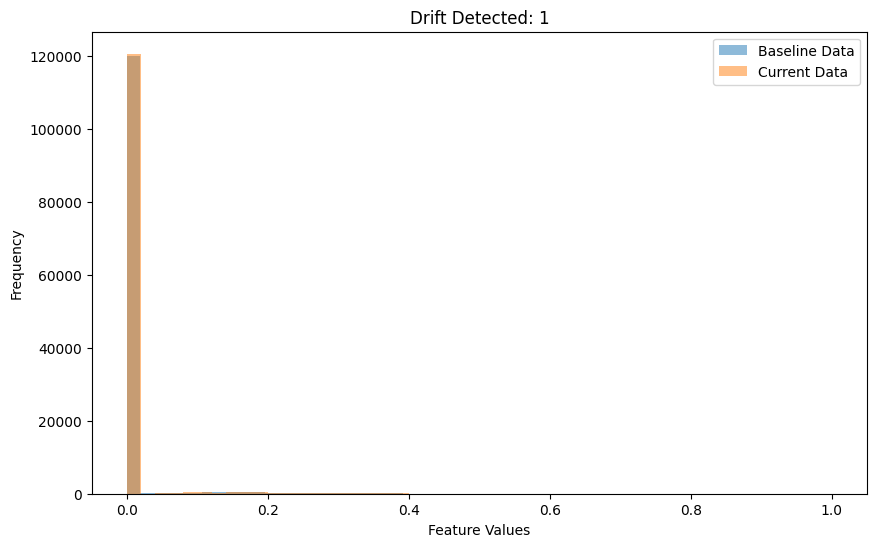

In [ ]:
#Using Alibi Detect for Drift Detection and visualization
from alibi_detect.cd import KSDrift
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Sentiment_analysis/Reviews.csv')

# Use the next 250 rows as the baseline data
baseline_df = df.iloc[500:750].copy()
current_df = df.iloc[750:1000].copy()  # Use the following 250 rows as the current data

# Clean the text in the baseline and current data
baseline_df.loc[:, 'Cleaned_Text'] = baseline_df['Text'].apply(clean_text)
current_df.loc[:, 'Cleaned_Text'] = current_df['Text'].apply(clean_text)

# Vectorize the baseline and current data
baseline_X = vectorizer.transform(baseline_df['Cleaned_Text']).toarray()
current_X = vectorizer.transform(current_df['Cleaned_Text']).toarray()

# Initialize the drift detector
cd = KSDrift(baseline_X, p_val=0.05)

# Detect drift
preds = cd.predict(current_X)
drift = preds['data']['is_drift']

# Plot the results
plt.figure(figsize=(10, 6))
plt.hist(baseline_X.flatten(), bins=50, alpha=0.5, label='Baseline Data')
plt.hist(current_X.flatten(), bins=50, alpha=0.5, label='Current Data')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title(f'Drift Detected: {drift}')
plt.legend()
plt.show()

# Log drift metrics to MLflow
mlflow.log_metric('drift_detected', int(drift))

#Making the MLflow UI accessible over the internet

start the MLflow UI using the following command:


Since Colab doesn’t support local servers directly, we use ngrok to create a public URL for the MLflow UI:


In [ ]:
!pip install pyngrok


In [ ]:
!ngrok authtoken <authtoken>

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Start MLflow UI
get_ipython().system_raw("mlflow ui --port 5000 &")

# Create a public URL
public_url = ngrok.connect(5000, "http")
print(public_url)

NgrokTunnel: "https://d281-104-155-230-26.ngrok-free.app" -> "http://localhost:5000"


**NOTE:**

 If we want to access the MLflow UI remotely or share it with others, we need a way to expose the local server to the internet. Ngrok provides a convenient way to do this by creating a secure tunnel and generating a public URL.

 But to access the MLflow UI locally i.e on pc, we can skip these and access the UI directly via http://localhost:5000.

#Save the trained model

In [ ]:
# Save the trained model
model.save_pretrained('/content/inference/model')
tokenizer.save_pretrained('/content/inference/tokenizer')

('/content/inference/tokenizer/tokenizer_config.json',
 '/content/inference/tokenizer/special_tokens_map.json',
 '/content/inference/tokenizer/vocab.txt',
 '/content/inference/tokenizer/added_tokens.json')

#Create an Inference Script


In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Load the model and tokenizer
model = DistilBertForSequenceClassification.from_pretrained('/content/inference/model')
tokenizer = DistilBertTokenizer.from_pretrained('/content/inference/tokenizer')

# Function to predict the score of a review
def predict_review(review):
    inputs = tokenizer(review, padding='max_length', truncation=True, max_length=128, return_tensors='pt')
    outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=-1)
    return predictions.item() + 1  # Add 1 to match the original score range

# Interactive loop to get user input and predict the score
while True:
    review = input("Enter a review (or type 'exit' to quit): ")
    if review.lower() == 'exit':
        break
    score = predict_review(review)
    print(f"Predicted Score: {score}")

Enter a review (or type 'exit' to quit): The soap was big enough I will rate it well this time
Predicted Score: 5
Enter a review (or type 'exit' to quit): The perfume smells good but it is packaged in a small container
Predicted Score: 2
Enter a review (or type 'exit' to quit): Terrible product this it only worked for two days
Predicted Score: 1
Enter a review (or type 'exit' to quit): exit


Terrible product this it only worked for two days
The perfume smells good but it is packaged in a small container
The soap was big enough I will rate it well this time

# Create a requirements.txt file


In [ ]:
# Create a requirements.txt file
with open('/content/inference/requirements.txt', 'w') as f:
    f.write('torch\n')
    f.write('transformers\n')

In [ ]:
import shutil
# Path to the directory you want to zip
dir_path = '/content/inference'
# Path to the output zip file
output_path = '/content/inference.zip'
# Zip the directory
shutil.make_archive(output_path.replace('.zip', ''), 'zip', dir_path)

'/content/inference.zip'

#Download the Zip File


In [ ]:
from google.colab import files

# Download the zip file
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**HOW TO GET STARTED AFTER DOWNLOADING**

Install the required packages:   pip install -r requirements.txt

Run the inference script:     python3 inference.py

                                                       **END**